### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
pip install inflection


### Importing neccesary libraries

In [ ]:
import pandas as pd
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm,metrics,tree,preprocessing,linear_model
import numpy as np
from scipy   import stats
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from imblearn.over_sampling import SMOTE
from sklearn import svm,metrics,tree,preprocessing,linear_model
import lightgbm as lgb




### Analysis on Mobile Money dataset

In [ ]:
df1 = pd.read_csv("/content/MyDrive/MyDrive/thesis project/Datasets/Mobile money dataset/mobile_money_dataset")

In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 1.2.1 Column Descriptions

**step:** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount:** amount of the transaction in local currency.

**nameOrig:** customer who started the transaction

**oldbalanceOrg:** initial balance before the transaction

**newbalanceOrig:** new balance after the transaction

**nameDest:** customer who is the recipient of the transaction

**oldbalanceDest:** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest:** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud:** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud:** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### 1.2.2 Column Rename

In [ ]:
cols_old = df1.columns.tolist()

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new

In [ ]:
cols_new

['step',
 'type',
 'amount',
 'name_orig',
 'oldbalance_org',
 'newbalance_orig',
 'name_dest',
 'oldbalance_dest',
 'newbalance_dest',
 'is_fraud',
 'is_flagged_fraud']

### 1.3 Data Dimension

In [ ]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 6362620
Number of Cols: 11


### 1.4 Data Types and Structure

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              object 
 2   amount            float64
 3   name_orig         object 
 4   oldbalance_org    float64
 5   newbalance_orig   float64
 6   name_dest         object 
 7   oldbalance_dest   float64
 8   newbalance_dest   float64
 9   is_fraud          int64  
 10  is_flagged_fraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### 1.5 Check NA

In [ ]:
df1.isna().sum()

step                0
type                0
amount              0
name_orig           0
oldbalance_org      0
newbalance_orig     0
name_dest           0
oldbalance_dest     0
newbalance_dest     0
is_fraud            0
is_flagged_fraud    0
dtype: int64

### Check Datatypes

In [ ]:
df1.dtypes

step                  int64
type                 object
amount              float64
name_orig            object
oldbalance_org      float64
newbalance_orig     float64
name_dest            object
oldbalance_dest     float64
newbalance_dest     float64
is_fraud              int64
is_flagged_fraud      int64
dtype: object

### Propoortion of fraud to non-fraud transactions

In [ ]:
value_counts = df1['is_fraud'].value_counts()
proportions = value_counts / len(df1)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
is_fraud,,
0,6354407,0.998709
1,8213,0.001291


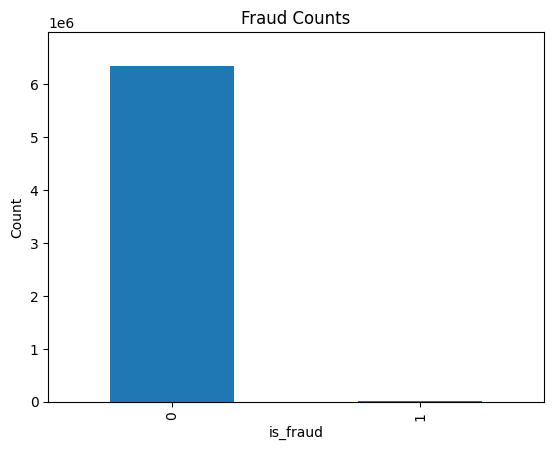

In [ ]:
import matplotlib.pyplot as plt

# Data
value_counts = df1['is_fraud'].value_counts()
proportions = value_counts / len(df1)

# Create a DataFrame
data = pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

# Plotting
fig, ax = plt.subplots()
data['Count'].plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('is_fraud')
ax.set_ylabel('Count')
ax.set_title('Fraud Counts')

# Set y-axis scale
max_count = data['Count'].max()
ax.set_ylim([0, max_count + max_count * 0.1])  # Adjust the scale to include a 10% buffer

# Show the plot
plt.show()

### Convert to categorical

In [ ]:
# Convert 'type', 'is_fraud', and 'is_flagged_fraud' columns to categorical
df1['type'] = df1['type'].astype('category')
df1['is_fraud'] = df1['is_fraud'].astype('category')
df1['is_flagged_fraud'] = df1['is_flagged_fraud'].astype('category')

In [ ]:
df1.dtypes

step                   int64
type                category
amount               float64
name_orig             object
oldbalance_org       float64
newbalance_orig      float64
name_dest             object
oldbalance_dest      float64
newbalance_dest      float64
is_fraud            category
is_flagged_fraud    category
dtype: object

## 1.7 Encoding

To allow for easier data analysis we encode convert the enoded variables to the words equivalent

In [ ]:
df1['is_fraud'] = df1['is_fraud'].map({1: 'yes', 0: 'no'})
df1['is_flagged_fraud'] = df1['is_flagged_fraud'].map({1: 'yes', 0: 'no'})

## 1.8 Descriptive Statistics

In [ ]:
num_attributes = df1.select_dtypes(exclude=['category', 'object'])

In [ ]:
num_attributes.columns

Index(['step', 'amount', 'oldbalance_org', 'newbalance_orig',
       'oldbalance_dest', 'newbalance_dest'],
      dtype='object')

In [ ]:
cat_attributes = df1.select_dtypes(include='category')
obj_attributes = df1.select_dtypes(include='object')

In [ ]:
cat_attributes.columns

Index(['type', 'is_fraud', 'is_flagged_fraud'], dtype='object')

In [ ]:
obj_attributes.columns

Index(['name_orig', 'name_dest'], dtype='object')

### 1.8.1 Numerical Attributes

In [ ]:
describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02,7.420000e+02,0.584772,0.375177,0.329071
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,9.244552e+07,3.357344,30.993949,1797.956705
oldbalance_org,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,5.958504e+07,3.463606,5.249136,32.964879
newbalance_orig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,4.958504e+07,3.419485,5.176884,32.066985
oldbalance_dest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,3.560159e+08,3.088194,19.921758,948.674125
newbalance_dest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,3.561793e+08,2.999298,19.352302,862.156508


### 1.8.2 Categorical Attributes

In [ ]:
cat_attributes.describe()

,type,is_fraud,is_flagged_fraud
count,6362620,6362620,6362620
unique,5,2,2
top,CASH_OUT,0,0
freq,2237500,6354407,6362604


### Correlation plot of Numerical Attributes

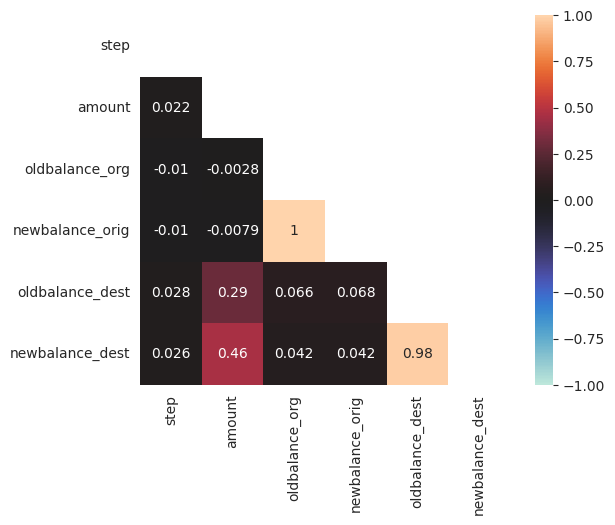

In [ ]:
corr = num_attributes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True)

### # 2.0 Feature Engineering

In [ ]:
df2 = df1.copy()

In [ ]:
# # step
# # df2['step_days'] = df2['step'].apply(lambda i: i/24)
# # df2['step_weeks'] = df2['step'].apply(lambda i: i/(24*7))

# # difference between initial balance before the transaction and new balance after the transaction
# df2['diff_new_old_balance'] = df2['newbalance_orig'] - df2['oldbalance_org']

# # difference between initial balance recipient before the transaction and new balance recipient after the transaction.
# df2['diff_new_old_destiny'] = df2['newbalance_dest'] - df2['oldbalance_dest']

# # # name orig and name dest
# # df2['name_orig'] = df2['name_orig'].apply(lambda i: i[0])
# # df2['name_dest'] = df2['name_dest'].apply(lambda i: i[0])

In [ ]:
# df2.head(10)

### 3.1 Selecting Columns

I'll use all the columns for data analysis

In [ ]:
df3 = df2.copy()

### 4.0 Exploratory Data Analisys

In [ ]:
 df4 = df3.copy()

### 4.1.1 Response Variable

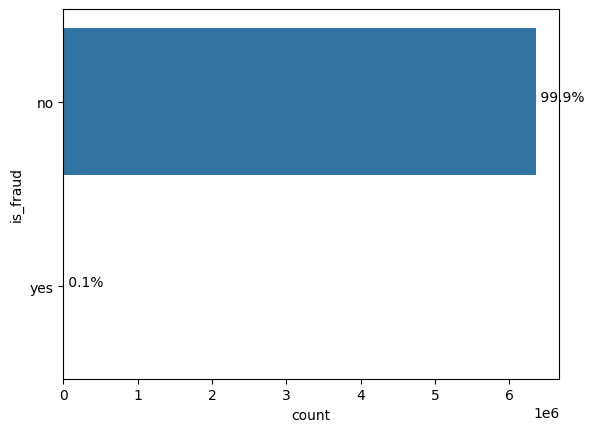

In [ ]:
ax = sns.countplot(y='is_fraud', data=df4);

total = df4['is_fraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### 4.1.2 Numerical Variables

<ipython-input-42-c9839425f771>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attributes[column])
<ipython-input-42-c9839425f771>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attributes[column])
<ipython-input-42-c9839425f771>:20: UserWarning: 

`distplot` is a deprecated functi

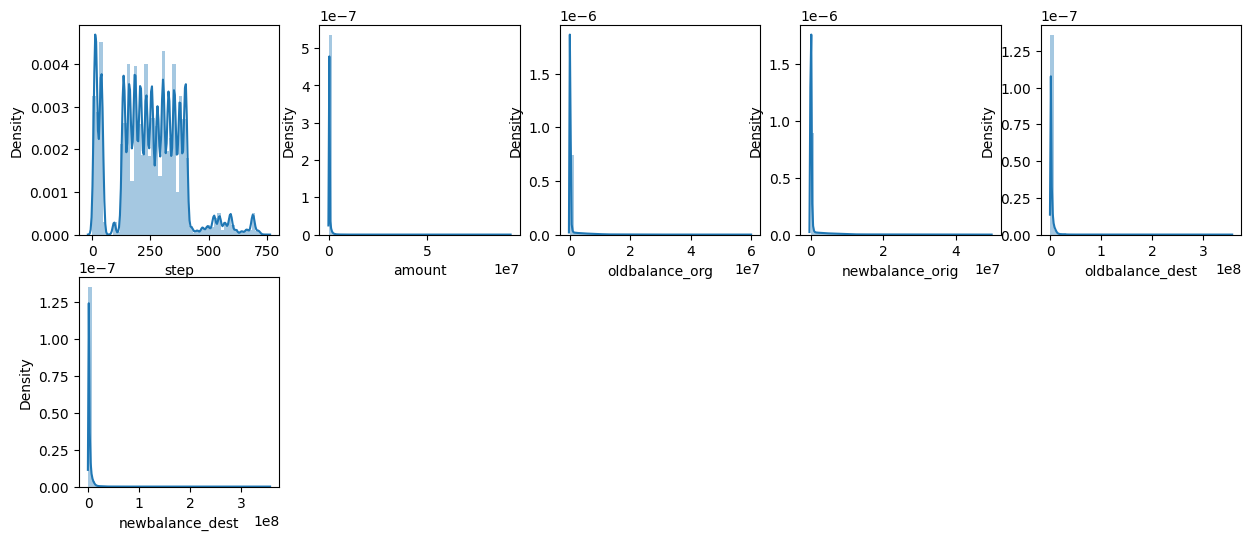

In [ ]:
# num_attributes = df4.select_dtypes(exclude='object')
# columns = num_attributes.columns.tolist()
# j = 1

# for column in columns:
#     plt.subplot(2, 5, j)
#     sns.distplot(num_attributes[column]);

#     j += 1


columns = num_attributes.columns.tolist()
j = 1

# Increase size of the plot
plt.figure(figsize=(15, 6))

for column in columns:
    plt.subplot(2, 5, j)
    sns.distplot(num_attributes[column])
    plt.xlabel(column)  # Set xlabel for each subplot
    plt.ylabel('Density')  # Set ylabel for each subplot
    j += 1


### 4.1.3 Categorical Variables

cat_attributes_sub = cat_attributes

### we subset inorder to create visuals without chrushing the notebook

In [ ]:
df4 = df4[:50000]

### We check the general price range for fraudulent transactions

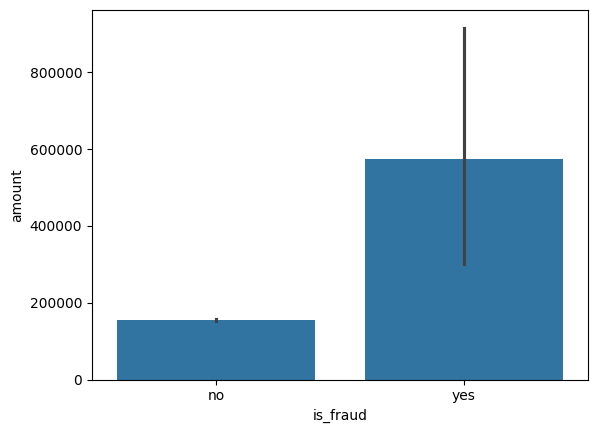

In [ ]:
sns.barplot(y='amount', x='is_fraud', data=df4);

### We visualize the transaction type and the amount of fraudulent transaction in each type

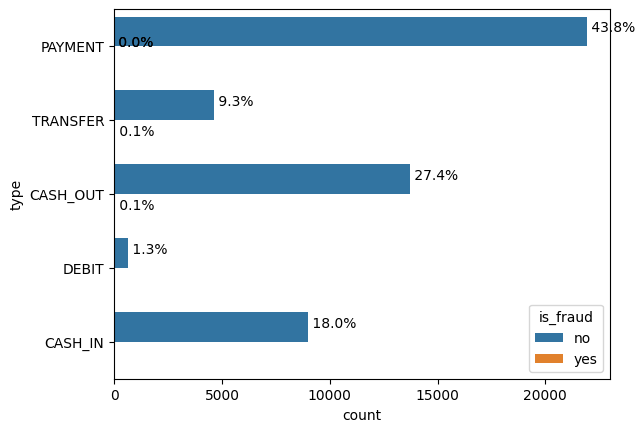

In [ ]:
ax = sns.countplot(y='type', hue='is_fraud', data=df4)

total = df4['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### 5.0 Data Preparation

In [ ]:
df5 = df3.copy()

In [ ]:
df5.columns

Index(['step', 'type', 'amount', 'name_orig', 'oldbalance_org',
       'newbalance_orig', 'name_dest', 'oldbalance_dest', 'newbalance_dest',
       'is_fraud', 'is_flagged_fraud'],
      dtype='object')

In [ ]:
df5.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,no,no
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,no,no
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,yes,no
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,yes,no
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,no,no


### Encoding the non-numerical variables

In [ ]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df5['type']  = le.fit_transform(df5['type'])
df5['name_orig']  = le.fit_transform(df5['name_orig'])
df5['name_dest']  = le.fit_transform(df5['name_dest'])
df5['is_fraud'] = df5['is_fraud'].map({'yes': 1, 'no': 0})
df5['is_flagged_fraud'] = df5['is_flagged_fraud'].map({'yes': 1, 'no': 0})

In [ ]:
df5.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### Applying SMOTE oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
# Oversampling the original data using the SMOTE algorithm
smote = SMOTE(random_state=1234)
X_smote, y_smote = smote.fit_resample(df5.drop(columns='is_fraud'), df5['is_fraud'])
df_smote = X_smote.join(y_smote)

In [ ]:
value_counts = df_smote['is_fraud'].value_counts()
proportions = value_counts / len(df_smote)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
is_fraud,,
0,6354407,0.5
1,6354407,0.5


### Visualizing correlations between all features

Correlation between all variables: numerical, object and categorical after oversampling

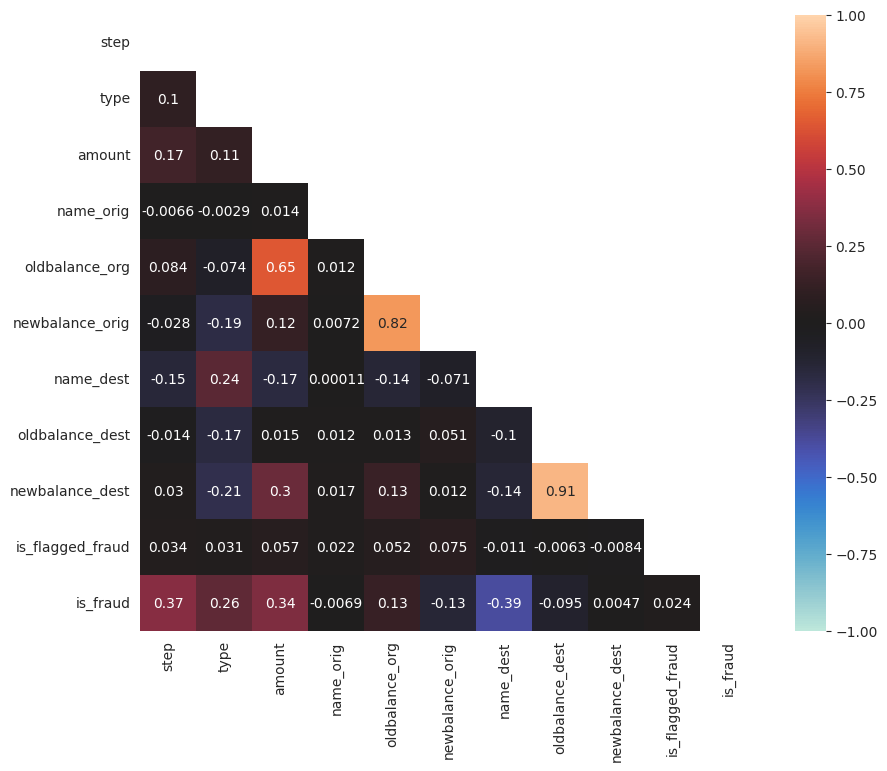

In [ ]:
corr = df_smote.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Increase size of the plot
plt.figure(figsize=(10, 8))

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True)



In [ ]:
df_smote.isna().sum()

step                   0
type                   0
amount                 0
name_orig              0
oldbalance_org         0
newbalance_orig        0
name_dest              0
oldbalance_dest        0
newbalance_dest        0
is_flagged_fraud    5394
is_fraud               0
dtype: int64

In [ ]:
df_smote = df_smote.dropna()

In [ ]:
df_smote.isna().sum()

step                0
type                0
amount              0
name_orig           0
oldbalance_org      0
newbalance_orig     0
name_dest           0
oldbalance_dest     0
newbalance_dest     0
is_flagged_fraud    0
is_fraud            0
dtype: int64

### Train Test Validation Split

### Analysis on online transactions (200 000 instances)

### Subsetting instances to 200 000 instances

In [ ]:
df5_2 = df5.sample(n=200000, random_state=42)

### Visualizing class proportions before SMOTE

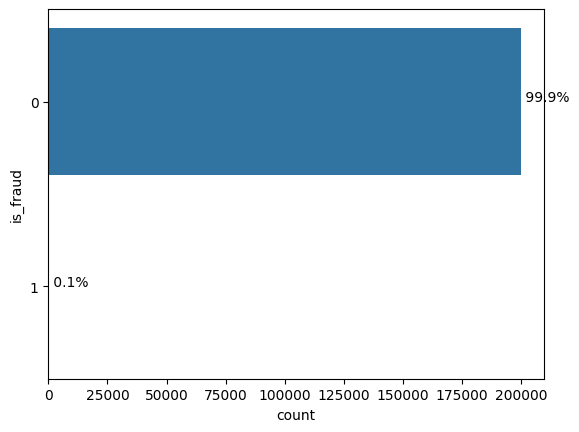

In [ ]:
ax = sns.countplot(y='is_fraud', data=df5_2);

total = df5_2['is_fraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Visualizing class proportions after SMOTE

In [ ]:
df5_200 = df_smote.sample(n=200000, random_state=42)

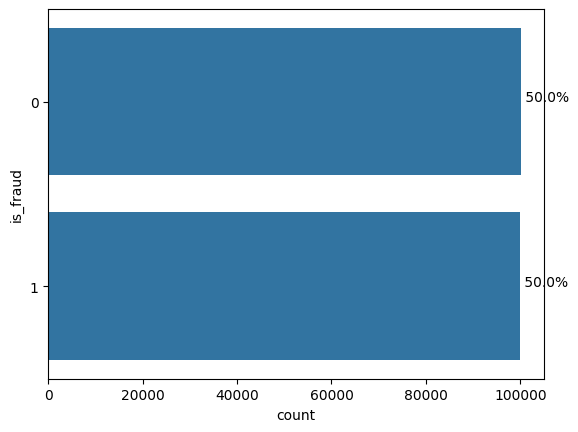

In [ ]:
ax = sns.countplot(y='is_fraud', data=df5_200);

total = df5_200['is_fraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Correlations Matrices before and after SMOTE

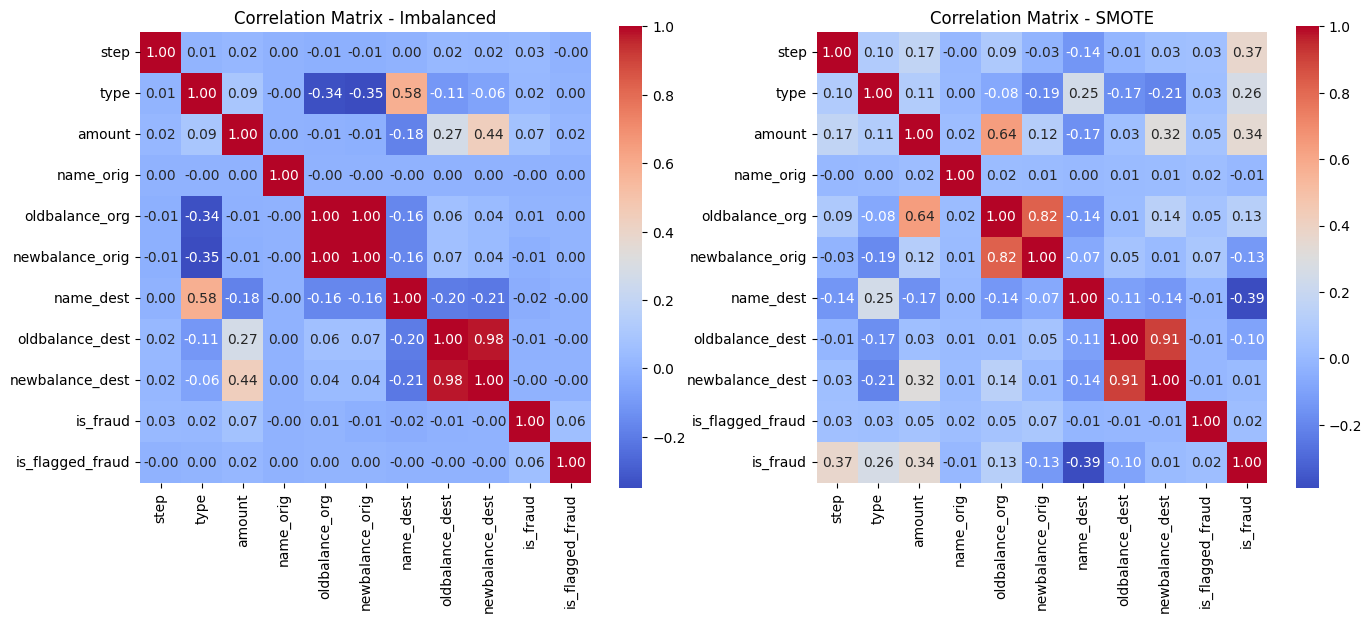

In [ ]:
# Calculate correlation matrices
correlation_matrix1 = df5_2.corr()
correlation_matrix2 = df5_200.corr()

# Plot correlation matrices as heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix - Imbalanced')

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[1])
axes[1].set_title('Correlation Matrix - SMOTE')

plt.show()

### Train Test Split


In [ ]:
# Separate features and target
X = df5_200.drop('is_fraud', axis=1)
y = df5_200['is_fraud']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Model Training (5 models)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 69526, number of negative: 70474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496614 -> initscore=-0.013543
[LightGBM] [Info] Start training from score -0.013543


### Models Validation Accuracies

In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 84.28%
SVM: Validation Accuracy = 89.41%
Random Forest: Validation Accuracy = 99.69%
XGBoost: Validation Accuracy = 99.77%
LightGBM: Validation Accuracy = 99.73%


### Best 2 Models test accuracies

In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


XGBoost : Test Accuracy: 99.65%
[LightGBM] [Info] Number of positive: 69526, number of negative: 70474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496614 -> initscore=-0.013543
[LightGBM] [Info] Start training from score -0.013543
LightGBM : Test Accuracy: 99.56%


### Models Performance Evaluation

Model: Logistic Regression
True Positives: 12485
True Negatives: 12770
False Positives: 2188
False Negatives: 2557
Accuracy: 84.18% = (tp + tn) / (tp + tn + fp + fn)
Precision: 85.09% = tp / (tp + fp)
Recall: 83.00% = tp / (tp + fn)
F1-score: 84.03% = 2 * precision * recall / (precision + recall)
Confusion Matrix:
[[12770  2188]
 [ 2557 12485]]
--------------------------------------------------
Model: SVM
True Positives: 12750
True Negatives: 13915
False Positives: 1043
False Negatives: 2292
Accuracy: 88.88% = (tp + tn) / (tp + tn + fp + fn)
Precision: 92.44% = tp / (tp + fp)
Recall: 84.76% = tp / (tp + fn)
F1-score: 88.43% = 2 * precision * recall / (precision + recall)
Confusion Matrix:
[[13915  1043]
 [ 2292 12750]]
--------------------------------------------------
Model: Random Forest
True Positives: 15000
True Negatives: 14872
False Positives: 86
False Negatives: 42
Accuracy: 99.57% = (tp + tn) / (tp + tn + fp + fn)
Precision: 99.43% = tp / (tp + fp)
Recall: 99.72% = tp / (tp + f

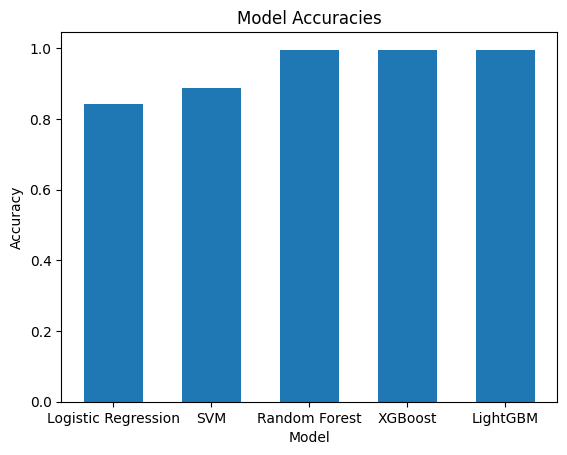

In [ ]:
accuracies = []

# Compare models using cross-validation
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracies.append(accuracy)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    print(f"Model: {model_name}")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Accuracy: {accuracy*100:.2f}% = (tp + tn) / (tp + tn + fp + fn)")
    print(f"Precision: {precision*100:.2f}% = tp / (tp + fp)")
    print(f"Recall: {recall*100:.2f}% = tp / (tp + fn)")
    print(f"F1-score: {f1*100:.2f}% = 2 * precision * recall / (precision + recall)")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 50)

# Plot bar graph for accuracies
bar_width = 0.6
x_pos = [i for i, _ in enumerate(sorted(models))]
plt.bar(x_pos, accuracies, width=bar_width, tick_label=list(models.keys()))
plt.xticks(x_pos)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()




### Balanced Accuracy Score

In [ ]:
models_data = {
    'Logistic Regression': {'TP': 12485, 'TN': 12770, 'FP': 2188, 'FN': 2557},
    'SVM': {'TP': 12750, 'TN': 13915, 'FP': 1043, 'FN': 2292},
    'Random Forest': {'TP': 15000, 'TN': 14874, 'FP': 84, 'FN': 42},
    'XGBoost': {'TP': 15014, 'TN': 14881, 'FP': 77, 'FN': 28},
    'LightGBM': {'TP': 15001, 'TN': 14868, 'FP': 90, 'FN': 41}
}

balanced_accuracy = {}

for model, data in models_data.items():
    tp = data['TP']
    tn = data['TN']
    fp = data['FP']
    fn = data['FN']
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_acc = (sensitivity + specificity) / 2
    balanced_accuracy[model] = round(balanced_acc * 100, 2)

print(balanced_accuracy)

{'Logistic Regression': 84.19, 'SVM': 88.89, 'Random Forest': 99.58, 'XGBoost': 99.65, 'LightGBM': 99.56}


### Confusion Matrices

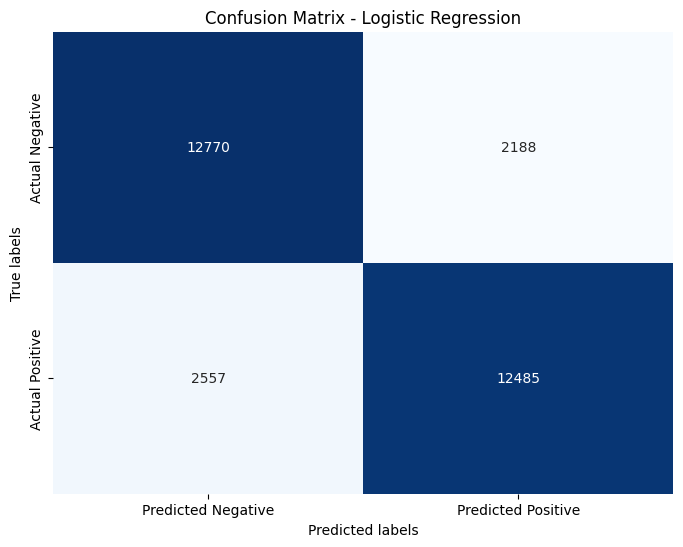

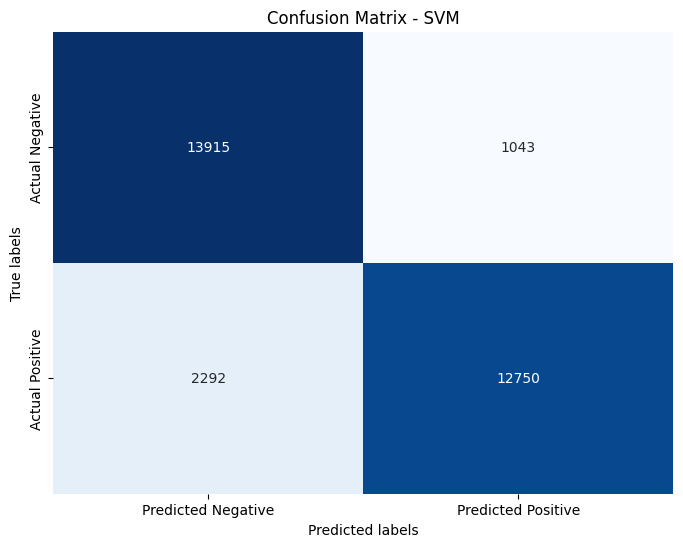

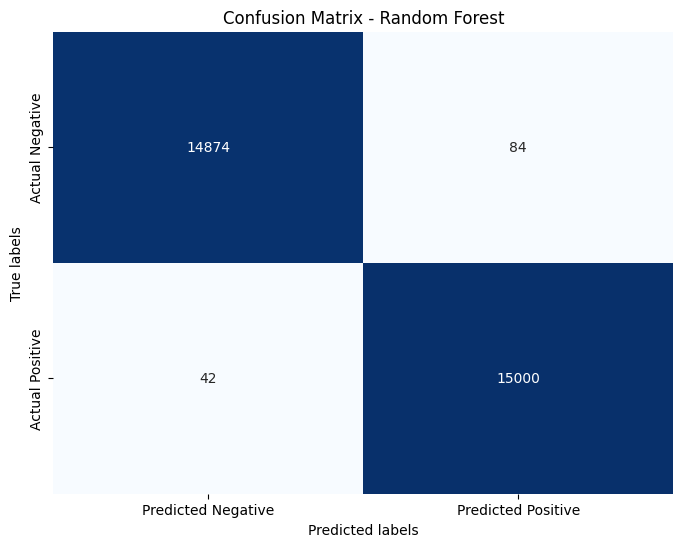

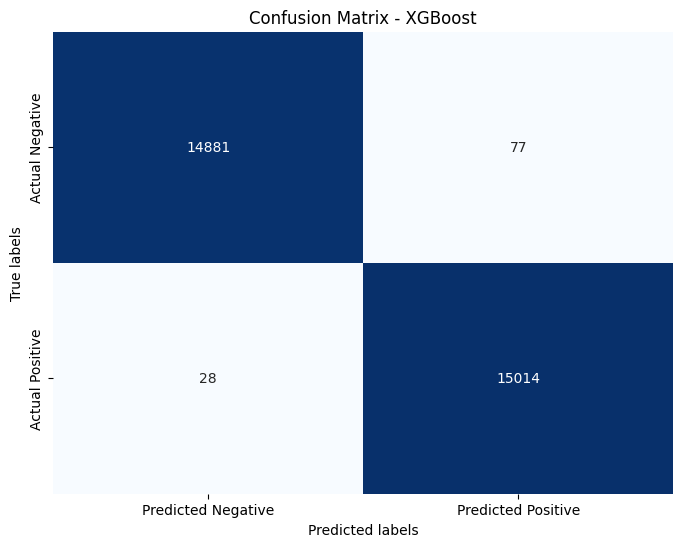

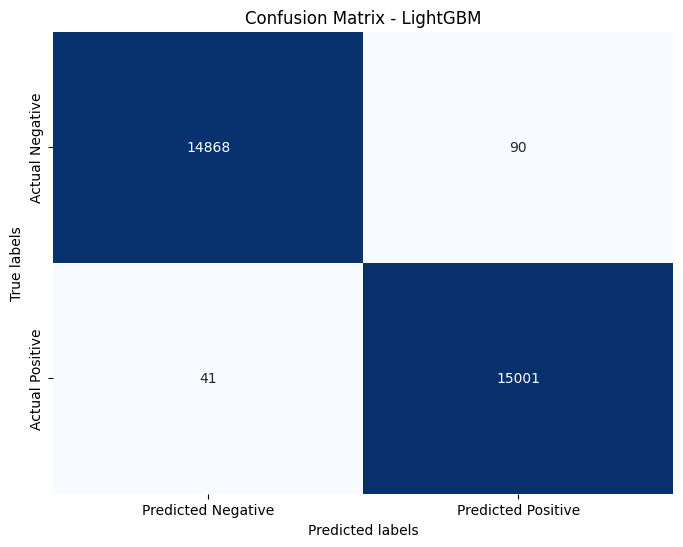

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define TP, TN, FP, FN for each model (example values)
models_data = {
    'Logistic Regression': {'TP': 12485, 'TN': 12770, 'FP': 2188, 'FN': 2557},
    'SVM': {'TP': 12750, 'TN': 13915, 'FP': 1043, 'FN': 2292},
    'Random Forest': {'TP': 15000, 'TN': 14874, 'FP': 84, 'FN': 42},
    'XGBoost': {'TP': 15014, 'TN': 14881, 'FP': 77, 'FN': 28},
    'LightGBM': {'TP': 15001, 'TN': 14868, 'FP': 90, 'FN': 41}
}

# Plot and save confusion matrices for each model
for model_name, data in models_data.items():
    TP, TN, FP, FN = data['TP'], data['TN'], data['FP'], data['FN']

    # Create confusion matrix
    conf_matrix = np.array([[TN, FP], [FN, TP]])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    plt.savefig(f'confusion_matrix_{model_name}.png')  # Save plot as PNG file
    plt.close()


### Visualizing Models performance metrcis for comparison

In [ ]:
# Initialize dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Compare models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred)
    recall_scores[model_name] = recall_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)


In [ ]:
# Create dataframes for visualization
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_scores.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_scores.items()), columns=['Model', 'Recall'])
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1-Score'])

# Combine dataframes
metrics_df = accuracy_df.merge(precision_df, on='Model').merge(recall_df, on='Model').merge(f1_df, on='Model')


<ipython-input-199-11dd2eacaa78>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df.sort_values(by='Accuracy', ascending=False), palette=palette)
<ipython-input-199-11dd2eacaa78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df.sort_values(by='Precision', ascending=False), palette=palette)
<ipython-input-199-11dd2eacaa78>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df.sort_values(by='Recall', ascending=False), palette=

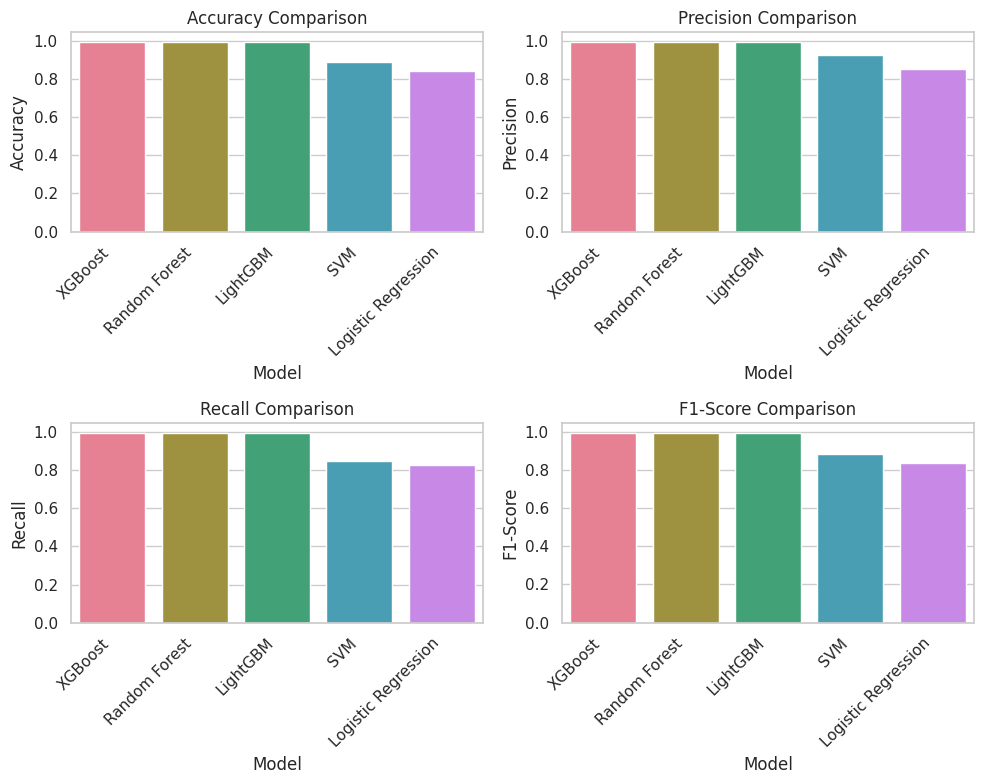

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Define a color palette for the models
palette = sns.color_palette("husl", len(metrics_df['Model'].unique()))

# Accuracy comparison
plt.subplot(221)
sns.barplot(x='Model', y='Accuracy', data=metrics_df.sort_values(by='Accuracy', ascending=False), palette=palette)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Precision comparison
plt.subplot(222)
sns.barplot(x='Model', y='Precision', data=metrics_df.sort_values(by='Precision', ascending=False), palette=palette)
plt.title('Precision Comparison')
plt.xticks(rotation=45, ha='right')

# Recall comparison
plt.subplot(223)
sns.barplot(x='Model', y='Recall', data=metrics_df.sort_values(by='Recall', ascending=False), palette=palette)
plt.title('Recall Comparison')
plt.xticks(rotation=45, ha='right')

# F1-Score comparison
plt.subplot(224)
sns.barplot(x='Model', y='F1-Score', data=metrics_df.sort_values(by='F1-Score', ascending=False), palette=palette)
plt.title('F1-Score Comparison')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
X_test.dtypes

step                   int64
type                   int64
amount               float64
name_orig              int64
oldbalance_org       float64
newbalance_orig      float64
name_dest              int64
oldbalance_dest      float64
newbalance_dest      float64
is_flagged_fraud    category
dtype: object

In [ ]:
X_train['is_flagged_fraud'] = X_train['is_flagged_fraud'].astype('int')

### Using RFE

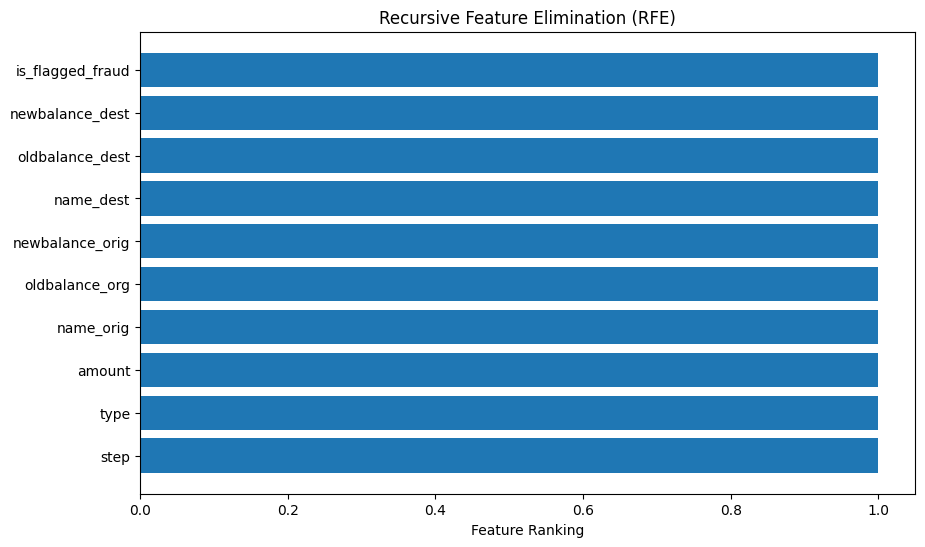

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=clf, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the ranking of features (1 indicates selected, 0 indicates not selected)
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Plot bar plot of feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(feature_ranking)), feature_ranking)
ax.set_yticks(range(len(feature_ranking)))
ax.set_yticklabels(selected_features)
ax.set_xlabel('Feature Ranking')
ax.set_title('Recursive Feature Elimination (RFE)')
plt.show()


### SHAP Explainer

In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(xgboost_model)

# Explain predictions for the test set
shap_values = explainer(X_train)

In [ ]:
shap_values.shape

(140000, 10)

### Beeswarm plot

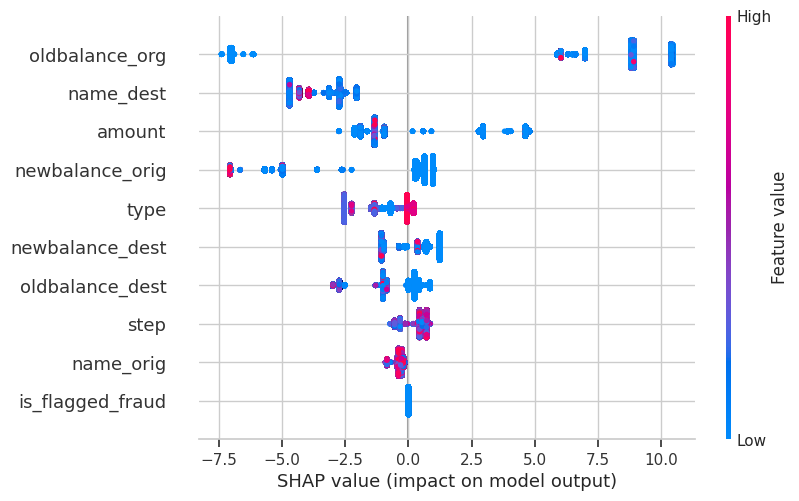

In [ ]:
shap.plots.beeswarm(shap_values)

### Waterfall Plot

### Gives information above individual predictions

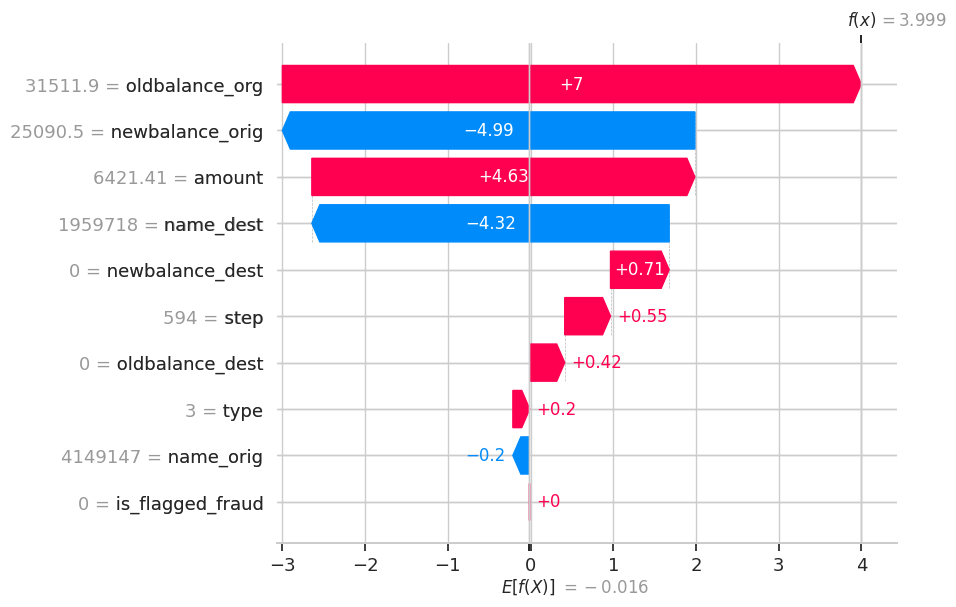

In [ ]:
#Waterfall plot for first observation
shap.plots.waterfall(shap_values[107])

### Absolute Mean SHAP

### Gives information about which features are most important to the model

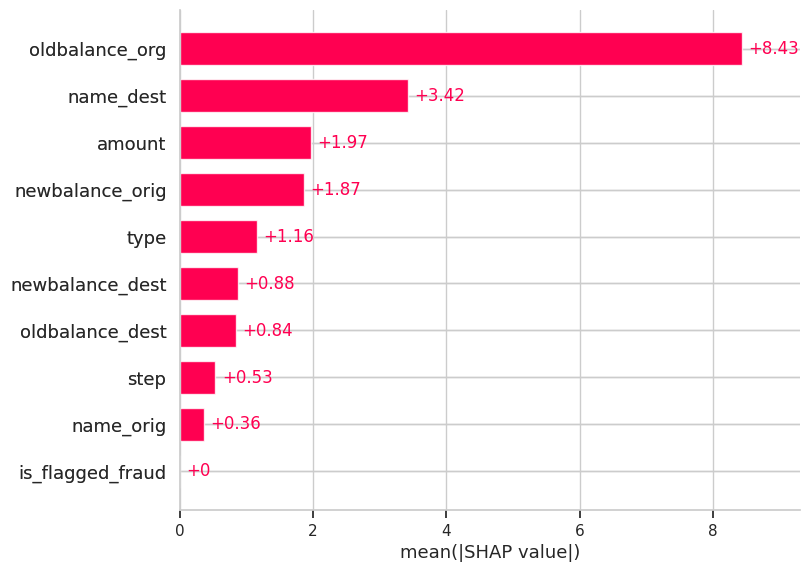

In [ ]:
shap.plots.bar(shap_values)

### Applying Permutation Feature Importance

In [ ]:
# Function to calculate permutation feature importance
def permutation_importance(model, X, y, metric, num_iterations=100):
    baseline_score = metric(y, model.predict(X))
    importances = {}
    for col in X.columns:
        importance_scores = []
        for _ in range(num_iterations):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col])
            permuted_score = metric(y, model.predict(X_permuted))
            #importance_scores.append(permuted_score - baseline_score)
            importance_scores.append(baseline_score - permuted_score)
        importances[col] = np.mean(importance_scores)
    return importances



Permutation Feature Importances:
type: -0.0188
step: 0.0000
amount: 0.0000
name_orig: 0.0000
name_dest: 0.0000
is_flagged_fraud: 0.0000
oldbalance_dest: 0.0139
newbalance_dest: 0.0417
newbalance_orig: 0.0624
oldbalance_org: 0.0699


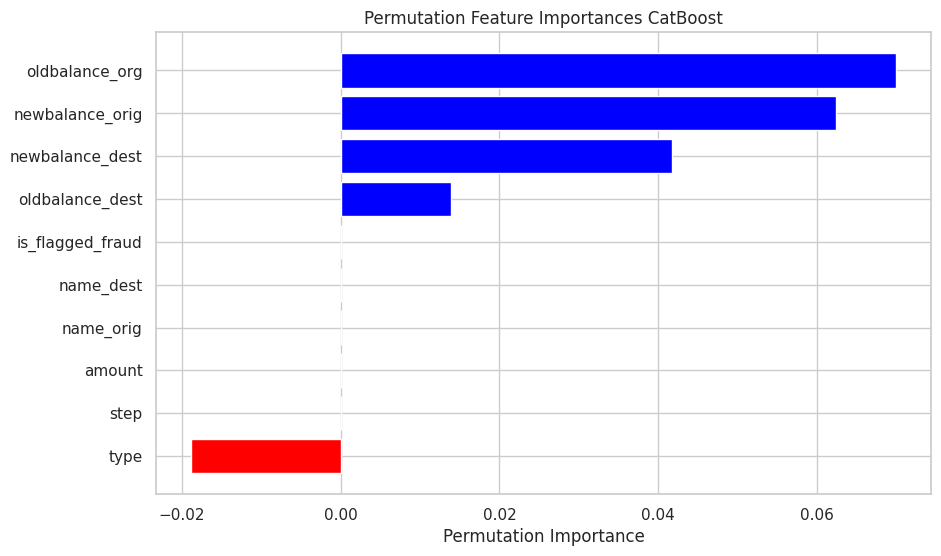

In [ ]:

# Calculate permutation feature importance
importances = permutation_importance(lightgbm_model, X_test, y_test, accuracy_score)

# Sort feature importances
sorted_importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=False)}

# Print feature importances
print("\nPermutation Feature Importances:")
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))

# Assigning colors based on values
colors = ['blue' if v >= 0 else 'red' for v in sorted_importances.values()]

plt.barh(range(len(sorted_importances)), list(sorted_importances.values()), color=colors, align='center')
plt.yticks(range(len(sorted_importances)), list(sorted_importances.keys()))
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importances CatBoost')
plt.show()

### Training Models with important features

### Important Features from SHAP

In [ ]:
X_train.columns

Index(['step', 'type', 'amount', 'name_orig', 'oldbalance_org',
       'newbalance_orig', 'name_dest', 'oldbalance_dest', 'newbalance_dest',
       'is_flagged_fraud'],
      dtype='object')

In [ ]:
# Slected features from SHAP
selected_feat1 = ['oldbalance_org', 'name_dest', 'amount', 'newbalance_orig', 'type', 'newbalance_dest','oldbalance_dest', 'step','is_fraud']  # Specify the column names you want to keep
df_imp_feat_SHAP = df5_200[selected_feat1]  # Subset the DataFrame with selected columns


In [ ]:
# Separate features and target
X = df_imp_feat_SHAP.drop('is_fraud', axis=1)
y = df_imp_feat_SHAP['is_fraud']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 69526, number of negative: 70474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496614 -> initscore=-0.013543
[LightGBM] [Info] Start training from score -0.013543


In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 84.46%
SVM: Validation Accuracy = 90.07%
Random Forest: Validation Accuracy = 99.51%
XGBoost: Validation Accuracy = 99.62%
LightGBM: Validation Accuracy = 99.56%


In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


XGBoost : Test Accuracy: 99.68%
[LightGBM] [Info] Number of positive: 69931, number of negative: 70069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499507 -> initscore=-0.001971
[LightGBM] [Info] Start training from score -0.001971
LightGBM : Test Accuracy: 99.63%


### Important feautures from PFI

In [ ]:
X_train.columns

Index(['oldbalance_org', 'name_dest', 'amount', 'newbalance_orig', 'type',
       'newbalance_dest', 'oldbalance_dest', 'step'],
      dtype='object')

In [ ]:
# Selected features from PFI

selected_feat2 = ['oldbalance_org', 'newbalance_orig', 'newbalance_dest', 'oldbalance_dest','type', 'is_fraud']


df_imp_feat_PFI = df5_200[selected_feat2]  # Subset the DataFrame with selected columns


In [ ]:
# Separate features and target
X = df_imp_feat_PFI.drop('is_fraud', axis=1)
y = df_imp_feat_PFI['is_fraud']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 69931, number of negative: 70069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499507 -> initscore=-0.001971
[LightGBM] [Info] Start training from score -0.001971


In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 81.58%
SVM: Validation Accuracy = 86.76%
Random Forest: Validation Accuracy = 98.51%
XGBoost: Validation Accuracy = 98.35%
LightGBM: Validation Accuracy = 98.13%


In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


Random Forest : Test Accuracy: 98.69%
XGBoost : Test Accuracy: 98.47%


### Analysis on Credit Card transactions Dataset

In [ ]:
%cd /content/MyDrive/MyDrive/thesis project/Datasets
!ls

/content/MyDrive/MyDrive/thesis project/Datasets
 adult.data	  'archive(4).zip'		    fraudTrain.csv	    'Mobile money dataset'
'archive(3)'	   creditcard.csv		   'fraudTrain.csv(1).zip'
'archive(3).zip'   data_preprosing_month_hist.csv   insurance_claims.csv


### Loading the dataset

In [ ]:
# Load the dataset
cred_data = pd.read_csv('/content/MyDrive/MyDrive/thesis project/Datasets/data_preprosing_month_hist.csv')  # Replace with your dataset file path


In [ ]:
cred_data.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category
0,2003,0,0,2008,5,2,13:28,$9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-05-02 13:28:00,13,Friday,Retail Outlet Services
1,2004,0,0,2008,5,3,13:46,$36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No,2008-05-03 13:46:00,13,Saturday,Retail Outlet Services
2,2005,0,0,2008,5,4,13:17,$11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No,2008-05-04 13:17:00,13,Sunday,Miscellaneous Stores
3,2006,0,0,2008,5,5,06:25,$123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-05-05 06:25:00,6,Monday,Retail Outlet Services
4,2007,0,0,2008,5,7,13:32,$77.62,Swipe Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No,2008-05-07 13:32:00,13,Wednesday,Retail Outlet Services


In [ ]:
cred_data.columns

Index(['Unnamed: 0', 'User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount',
       'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip',
       'MCC', 'Errors?', 'Is Fraud?', 'trans_date_trans_time', 'trans_hour',
       'day_of_week', 'category'],
      dtype='object')

In [ ]:
# Subset and select specific columns
selected_columns = ['User', 'Card','Amount' ,'Use Chip' ,'Merchant Name' ,'Merchant City', 'Merchant State','Errors?' ,'trans_date_trans_time','trans_hour','day_of_week','category','Is Fraud?' ]  # Columns to select
df_cred = cred_data[selected_columns]

In [ ]:
df_cred.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Errors?,trans_date_trans_time,trans_hour,day_of_week,category,Is Fraud?
0,0,0,$9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-02 13:28:00,13,Friday,Retail Outlet Services,No
1,0,0,$36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,2008-05-03 13:46:00,13,Saturday,Retail Outlet Services,No
2,0,0,$11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,NaN,2008-05-04 13:17:00,13,Sunday,Miscellaneous Stores,No
3,0,0,$123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-05 06:25:00,6,Monday,Retail Outlet Services,No
4,0,0,$77.62,Swipe Transaction,1913477460590765860,La Verne,CA,NaN,2008-05-07 13:32:00,13,Wednesday,Retail Outlet Services,No


In [ ]:
df_cred['Merchant State'].isna().sum()

21734

In [ ]:
df_cred['Merchant State'].isna().sum()

21734

In [ ]:
df_cred['Merchant State'].unique()

array(['CA', nan, 'NY', 'NJ', 'PA', 'MN', 'MI', 'NC', 'IA', 'WI', 'KY',
       'GA', 'OH', 'AR', 'OK', 'TX', 'LA', 'TN', 'AZ', 'FL', 'SC', 'NM',
       'IL', 'MS', 'NV', 'VT', 'AL', 'MA', 'CT', 'Mexico', 'KS', 'MO',
       'HI', 'NE', 'India', 'CO', 'IN', 'VA', 'WV', 'Spain', 'WA',
       'Philippines', 'ME', 'WY', 'AK', 'MD', 'Kosovo', 'Switzerland',
       'UT', 'ID', 'MT', 'ND', 'NH', 'DC', 'Kiribati', 'Japan',
       'United Kingdom', 'Germany', 'OR', 'France', 'Canada', 'Ecuador',
       'SD', 'DE', 'Monaco', 'Saudi Arabia', 'RI', 'Greece', 'Taiwan',
       'El Salvador', 'Italy', 'China', 'Netherlands', 'Hungary',
       'Israel', 'Jamaica', 'Thailand', 'South Korea',
       'Dominican Republic', 'Belgium', 'Costa Rica', 'Argentina',
       'Poland', 'Bangladesh', 'Ireland', 'Hong Kong'], dtype=object)

In [ ]:
df_cred['Errors?'].unique()

array([nan, 'Bad PIN,', 'Insufficient Balance,', 'Technical Glitch,',
       'Bad Expiration,', 'Bad CVV,', 'Bad Card Number,',
       'Bad PIN,Insufficient Balance,',
       'Insufficient Balance,Technical Glitch,',
       'Bad PIN,Technical Glitch,', 'Bad Zipcode,'], dtype=object)

In [ ]:
df_cred.shape

(209049, 13)

In [ ]:
df_cred.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Errors?,trans_date_trans_time,trans_hour,day_of_week,category,Is Fraud?
0,0,0,$9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-02 13:28:00,13,Friday,Retail Outlet Services,No
1,0,0,$36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,2008-05-03 13:46:00,13,Saturday,Retail Outlet Services,No
2,0,0,$11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,NaN,2008-05-04 13:17:00,13,Sunday,Miscellaneous Stores,No
3,0,0,$123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-05 06:25:00,6,Monday,Retail Outlet Services,No
4,0,0,$77.62,Swipe Transaction,1913477460590765860,La Verne,CA,NaN,2008-05-07 13:32:00,13,Wednesday,Retail Outlet Services,No


In [ ]:
# Remove $ sign from "Amount" column
df_cred['Amount'] = df_cred['Amount'].str.replace('$', '')

<ipython-input-9-e6c87c718643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cred['Amount'] = df_cred['Amount'].str.replace('$', '')


In [ ]:
df_cred.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Errors?,trans_date_trans_time,trans_hour,day_of_week,category,Is Fraud?
0,0,0,9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-02 13:28:00,13,Friday,Retail Outlet Services,No
1,0,0,36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,2008-05-03 13:46:00,13,Saturday,Retail Outlet Services,No
2,0,0,11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,NaN,2008-05-04 13:17:00,13,Sunday,Miscellaneous Stores,No
3,0,0,123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,NaN,2008-05-05 06:25:00,6,Monday,Retail Outlet Services,No
4,0,0,77.62,Swipe Transaction,1913477460590765860,La Verne,CA,NaN,2008-05-07 13:32:00,13,Wednesday,Retail Outlet Services,No


In [ ]:
df_cred['Merchant City'].unique()

array([2698,    0, 2671, ..., 1867, 2027, 1403])

In [ ]:
df_cred.dtypes

User                      int64
Card                      int64
Amount                   object
Use Chip                 object
Merchant Name             int64
Merchant City            object
Merchant State           object
Errors?                  object
trans_date_trans_time    object
trans_hour                int64
day_of_week              object
category                 object
Is Fraud?                object
dtype: object

In [ ]:
# Convert 'DateTime' column to datetime datatype
df_cred['trans_date_trans_time'] = pd.to_datetime(df_cred['trans_date_trans_time'])

<ipython-input-10-e00a504f053b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cred['trans_date_trans_time'] = pd.to_datetime(df_cred['trans_date_trans_time'])


In [ ]:
df_cred['Amount'] = df_cred['Amount'].astype(float)

<ipython-input-11-ba0fcfe49cb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cred['Amount'] = df_cred['Amount'].astype(float)


### Label Encoding

In [ ]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df_cred['Use Chip']  = le.fit_transform(df_cred['Use Chip'])
df_cred['Merchant City']  = le.fit_transform(df_cred['Merchant City'])
df_cred['Merchant State']  = le.fit_transform(df_cred['Merchant State'])
df_cred['Errors?']  = le.fit_transform(df_cred['Errors?'])
df_cred['day_of_week']  = le.fit_transform(df_cred['day_of_week'])
df_cred['category']  = le.fit_transform(df_cred['category'])
df_cred['Is Fraud?']  = le.fit_transform(df_cred['Is Fraud?'])
df_cred['trans_date_trans_time']  = le.fit_transform(df_cred['trans_date_trans_time'])


<ipython-input-12-952a977fc51f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cred['Use Chip']  = le.fit_transform(df_cred['Use Chip'])
<ipython-input-12-952a977fc51f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cred['Merchant City']  = le.fit_transform(df_cred['Merchant City'])
<ipython-input-12-952a977fc51f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
df_cred.head(10)

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Errors?,trans_date_trans_time,trans_hour,day_of_week,category,Is Fraud?
0,0,0,9.80,1,-727612092139916043,2698,7,10,1697,13,0,9,0
1,0,0,36.17,0,7035602569409149834,0,85,10,2818,13,2,9,0
2,0,0,11.99,1,-5023497618971072366,2671,7,10,3933,13,3,7,0
3,0,0,123.79,1,-727612092139916043,2698,7,10,4665,6,1,9,0
4,0,0,77.62,1,1913477460590765860,2179,7,10,7296,13,6,9,0
5,0,0,35.88,1,5817218446178736267,2179,7,10,8030,6,4,7,0
6,0,0,71.67,1,3189517333335617109,2179,7,10,8457,13,4,9,0
7,0,0,121.09,1,1913477460590765860,2179,7,10,11376,6,3,9,0
8,0,0,52.35,1,-727612092139916043,2698,7,10,11820,13,3,9,0
9,0,0,25.38,1,-4752064311331295725,2179,7,10,12833,11,1,10,0


In [ ]:
df_cred.isna().sum()

User                     0
Card                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State           0
Errors?                  0
trans_date_trans_time    0
trans_hour               0
day_of_week              0
category                 0
Is Fraud?                0
dtype: int64

In [ ]:
value_counts = df_cred['Is Fraud?'].value_counts()
proportions = value_counts / len(df_cred)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
Is Fraud?,,
0,208362,0.996714
1,687,0.003286


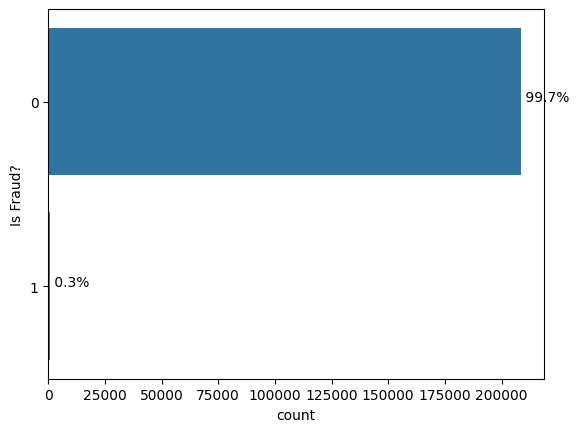

In [ ]:
ax = sns.countplot(y='Is Fraud?', data=df_cred);

total = df_cred['Is Fraud?'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Applying Oversampling (SMOTE)

In [ ]:
# Oversampling the original data using the SMOTE algorithm
smote = SMOTE(random_state=1234)
X_smote, y_smote = smote.fit_resample(df_cred.drop(columns='Is Fraud?'), df_cred['Is Fraud?'])
df_smote = X_smote.join(y_smote)

In [ ]:
value_counts = df_smote['Is Fraud?'].value_counts()
proportions = value_counts / len(df_smote)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
Is Fraud?,,
0,187139,0.5
1,187139,0.5


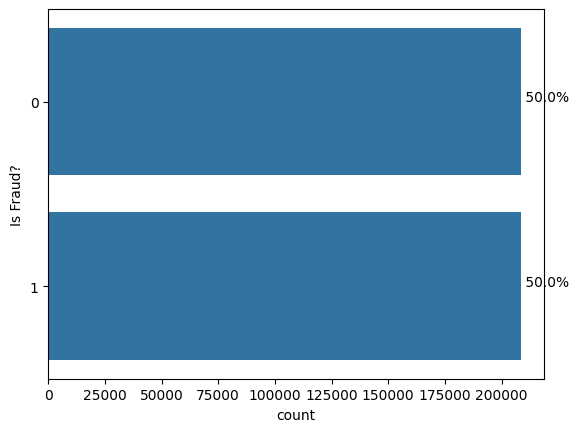

In [ ]:
ax = sns.countplot(y='Is Fraud?', data=df_smote);

total = df_smote['Is Fraud?'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

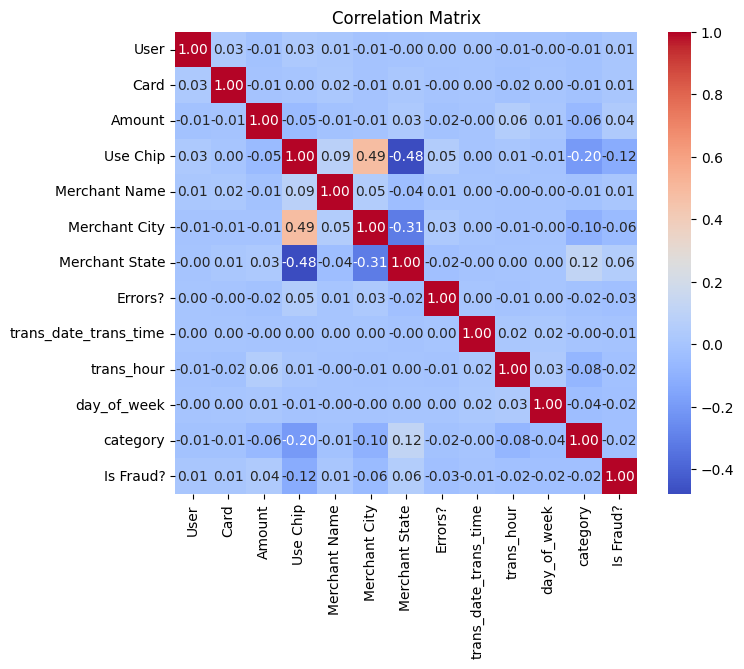

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_cred.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.05, 'Correlation heatmap:\noversampled data')

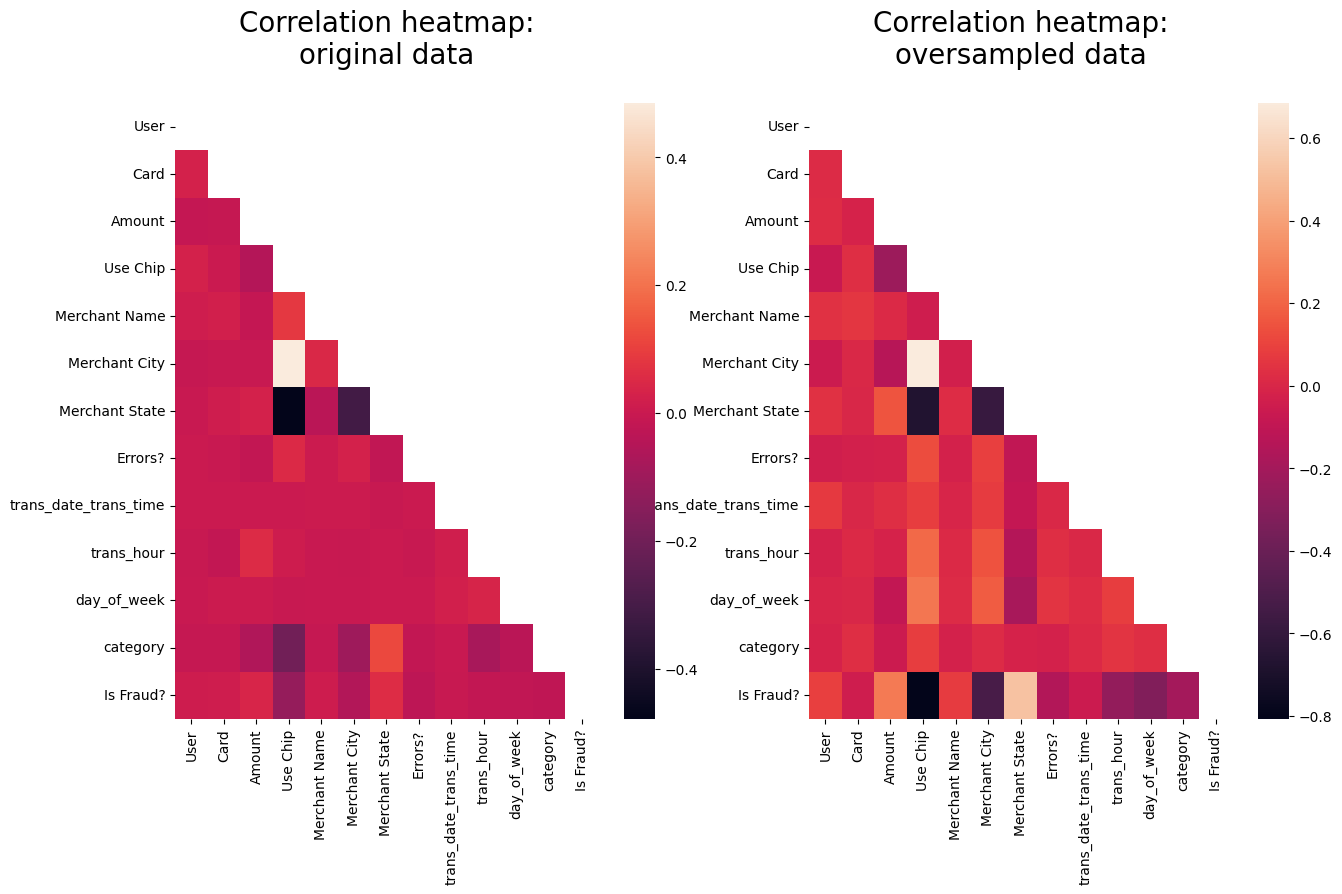

In [ ]:
# Let's plot the correlation heatmaps for both the original data and the oversampled data.
f, (ax1, ax2) = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
mask = np.triu(np.ones_like(df_cred.corr(), dtype=bool))
sns.heatmap(df_cred.corr(), mask = mask, ax=ax1)
ax1.set_title("Correlation heatmap:\noriginal data",fontsize=20, y=1.05)
sns.heatmap(df_smote.corr(), mask = mask, ax=ax2)
ax2.set_title("Correlation heatmap:\noversampled data",fontsize=20, y=1.05)

In [ ]:
# Separate features and target
X = df_cred.drop('Is Fraud?', axis=1)
y = df_cred['Is Fraud?']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 484, number of negative: 145850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1423
[LightGBM] [Info] Number of data points in the train set: 146334, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003308 -> initscore=-5.708249
[LightGBM] [Info] Start training from score -5.708249


In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 99.65%
SVM: Validation Accuracy = 99.65%
Random Forest: Validation Accuracy = 99.75%
XGBoost: Validation Accuracy = 99.84%
LightGBM: Validation Accuracy = 99.73%


In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


XGBoost : Test Accuracy: 99.85%
Random Forest : Test Accuracy: 99.77%


<ipython-input-18-359edc12e72e>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


Model: Logistic Regression
True Positives: 0
True Negatives: 31264
False Positives: 0
False Negatives: 94
Accuracy: 99.70% = (tp + tn) / (tp + tn + fp + fn)
Precision: nan% = tp / (tp + fp)
Recall: 0.00% = tp / (tp + fn)
F1-score: nan% = 2 * precision * recall / (precision + recall)
Confusion Matrix:
[[31264     0]
 [   94     0]]
--------------------------------------------------


<ipython-input-18-359edc12e72e>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


Model: SVM
True Positives: 0
True Negatives: 31264
False Positives: 0
False Negatives: 94
Accuracy: 99.70% = (tp + tn) / (tp + tn + fp + fn)
Precision: nan% = tp / (tp + fp)
Recall: 0.00% = tp / (tp + fn)
F1-score: nan% = 2 * precision * recall / (precision + recall)
Confusion Matrix:
[[31264     0]
 [   94     0]]
--------------------------------------------------
Model: Random Forest
True Positives: 23
True Negatives: 31262
False Positives: 2
False Negatives: 71
Accuracy: 99.77% = (tp + tn) / (tp + tn + fp + fn)
Precision: 92.00% = tp / (tp + fp)
Recall: 24.47% = tp / (tp + fn)
F1-score: 38.66% = 2 * precision * recall / (precision + recall)
Confusion Matrix:
[[31262     2]
 [   71    23]]
--------------------------------------------------
Model: XGBoost
True Positives: 48
True Negatives: 31263
False Positives: 1
False Negatives: 46
Accuracy: 99.85% = (tp + tn) / (tp + tn + fp + fn)
Precision: 97.96% = tp / (tp + fp)
Recall: 51.06% = tp / (tp + fn)
F1-score: 67.13% = 2 * precision * 

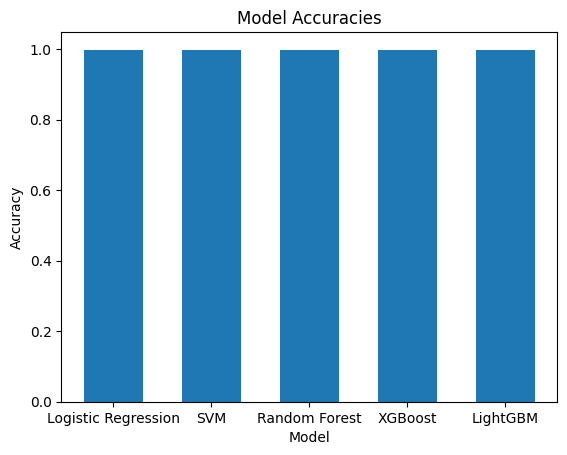

In [ ]:
accuracies = []

# Compare models using cross-validation
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracies.append(accuracy)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    print(f"Model: {model_name}")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Accuracy: {accuracy*100:.2f}% = (tp + tn) / (tp + tn + fp + fn)")
    print(f"Precision: {precision*100:.2f}% = tp / (tp + fp)")
    print(f"Recall: {recall*100:.2f}% = tp / (tp + fn)")
    print(f"F1-score: {f1*100:.2f}% = 2 * precision * recall / (precision + recall)")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 50)

# Plot bar graph for accuracies
bar_width = 0.6
x_pos = [i for i, _ in enumerate(sorted(models))]
plt.bar(x_pos, accuracies, width=bar_width, tick_label=list(models.keys()))
plt.xticks(x_pos)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()




In [ ]:
models_data = {
    'Logistic Regression2': {'TP': 0, 'TN': 31264, 'FP': 0, 'FN': 94},
    'SVM2': {'TP': 0, 'TN': 31264, 'FP': 0, 'FN': 94},
    'Random Forest2': {'TP': 23, 'TN': 31264, 'FP': 0, 'FN': 71},
    'XGBoost2': {'TP': 48, 'TN': 31262, 'FP': 2, 'FN': 46},
    'LightGBM2': {'TP': 42, 'TN': 31197, 'FP': 67, 'FN': 52}
}

balanced_accuracy = {}

for model, data in models_data.items():
    tp = data['TP']
    tn = data['TN']
    fp = data['FP']
    fn = data['FN']
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_acc = (sensitivity + specificity) / 2
    balanced_accuracy[model] = round(balanced_acc * 100, 2)

print(balanced_accuracy)

{'Logistic Regression2': 50.0, 'SVM2': 50.0, 'Random Forest2': 62.23, 'XGBoost2': 75.53, 'LightGBM2': 72.23}


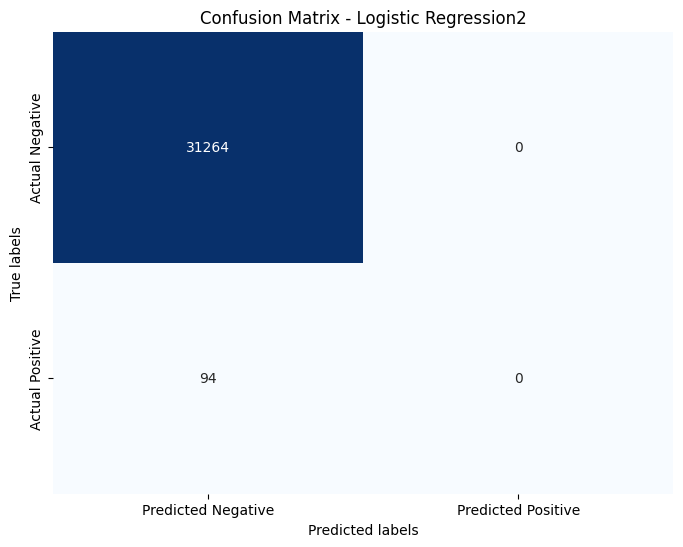

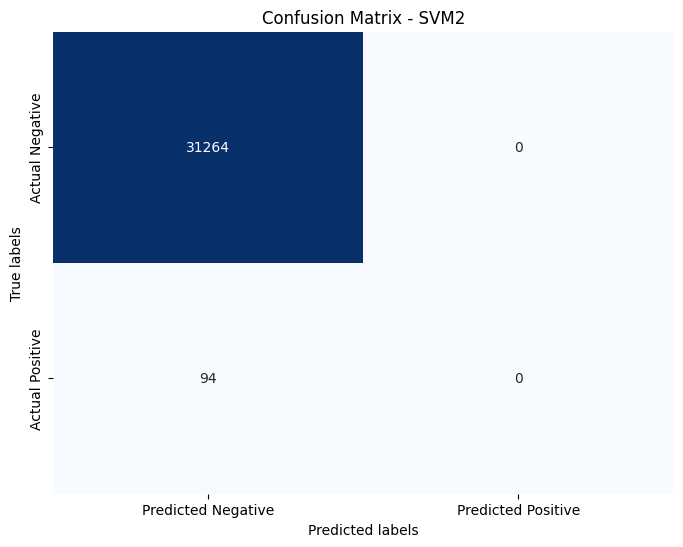

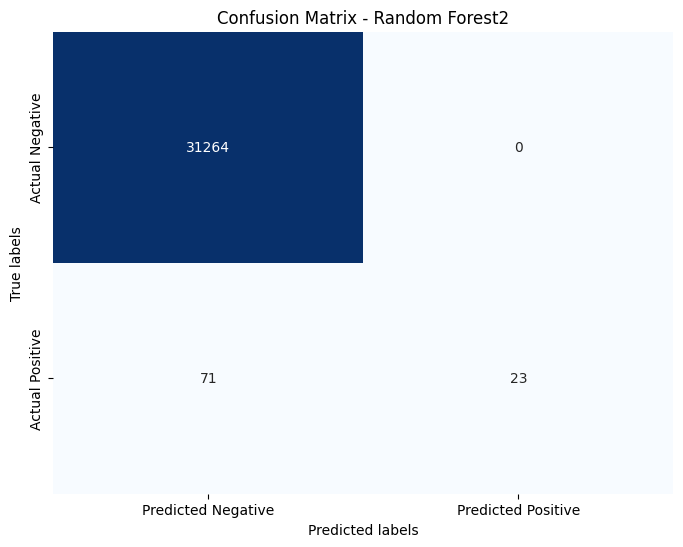

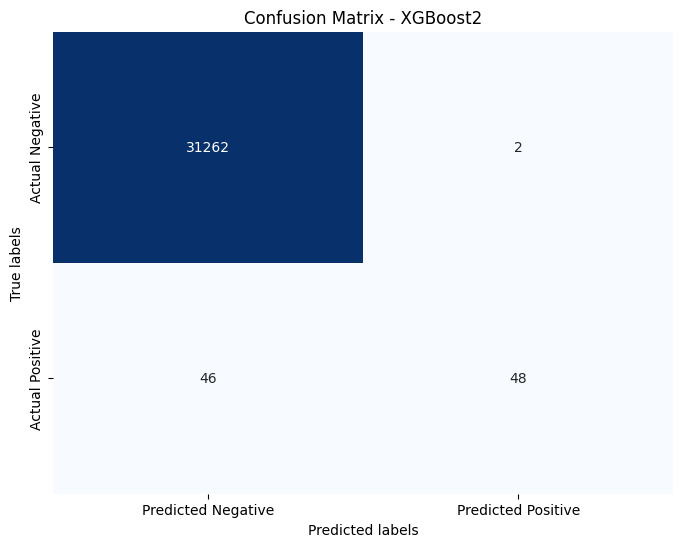

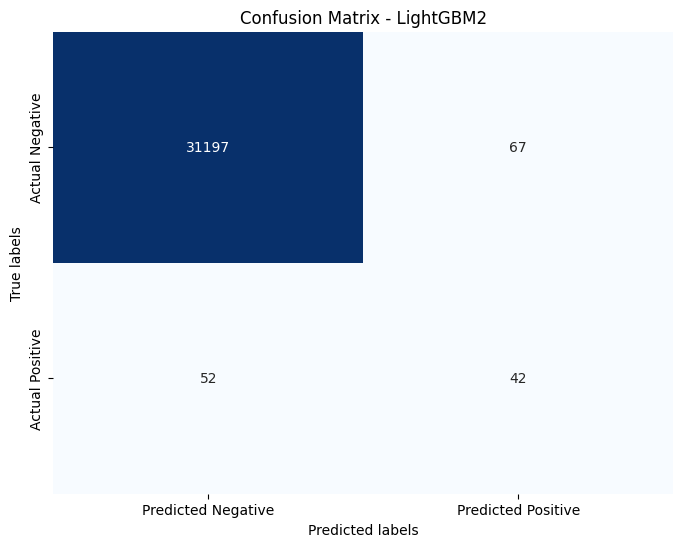

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define TP, TN, FP, FN for each model (example values)
models_data = {
    'Logistic Regression2': {'TP': 0, 'TN': 31264, 'FP': 0, 'FN': 94},
    'SVM2': {'TP': 0, 'TN': 31264, 'FP': 0, 'FN': 94},
    'Random Forest2': {'TP': 23, 'TN': 31264, 'FP': 0, 'FN': 71},
    'XGBoost2': {'TP': 48, 'TN': 31262, 'FP': 2, 'FN': 46},
    'LightGBM2': {'TP': 42, 'TN': 31197, 'FP': 67, 'FN': 52}
}

# Plot and save confusion matrices for each model
for model_name, data in models_data.items():
    TP, TN, FP, FN = data['TP'], data['TN'], data['FP'], data['FN']

    # Create confusion matrix
    conf_matrix = np.array([[TN, FP], [FN, TP]])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    #plt.savefig(f'confusion_matrix_{model_name}.png')  # Save plot as PNG file
    #plt.close()
    plt.show()



In [ ]:
# Initialize dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Compare models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred)
    recall_scores[model_name] = recall_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Number of positive: 484, number of negative: 145850
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 146334, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003308 -> initscore=-5.708249
[LightGBM] [Info] Start training from score -5.708249


In [ ]:
# Create dataframes for visualization
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_scores.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_scores.items()), columns=['Model', 'Recall'])
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1-Score'])

# Combine dataframes
metrics_df = accuracy_df.merge(precision_df, on='Model').merge(recall_df, on='Model').merge(f1_df, on='Model')


<ipython-input-91-11dd2eacaa78>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df.sort_values(by='Accuracy', ascending=False), palette=palette)
<ipython-input-91-11dd2eacaa78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df.sort_values(by='Precision', ascending=False), palette=palette)
<ipython-input-91-11dd2eacaa78>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df.sort_values(by='Recall', ascending=False), palette=pal

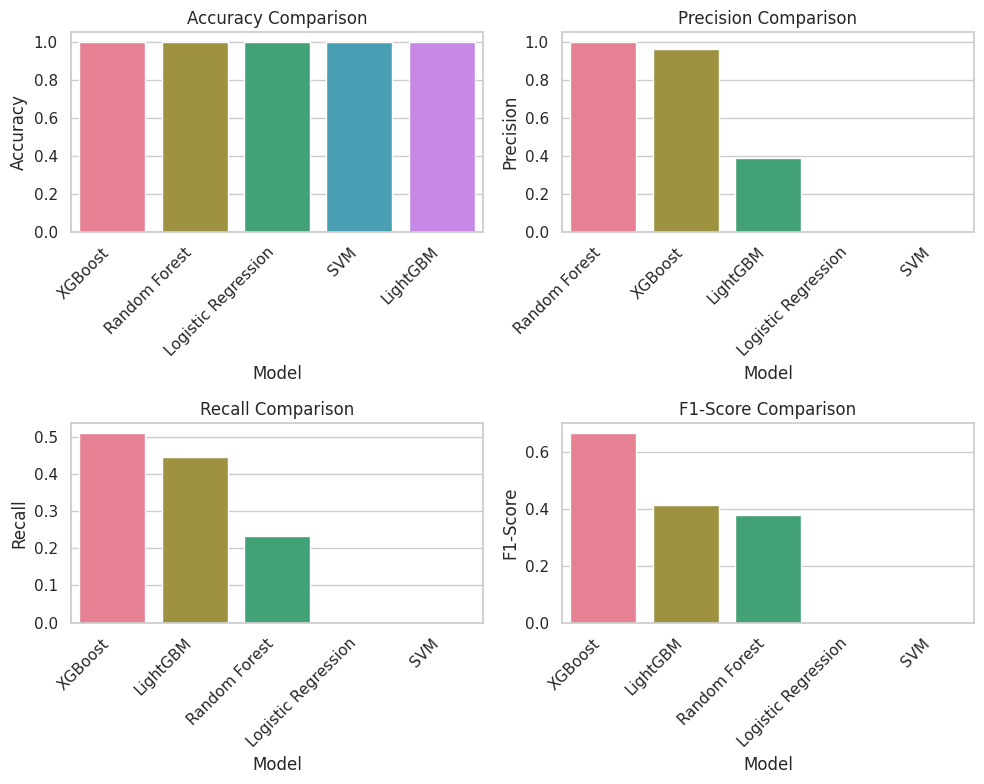

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Define a color palette for the models
palette = sns.color_palette("husl", len(metrics_df['Model'].unique()))

# Accuracy comparison
plt.subplot(221)
sns.barplot(x='Model', y='Accuracy', data=metrics_df.sort_values(by='Accuracy', ascending=False), palette=palette)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Precision comparison
plt.subplot(222)
sns.barplot(x='Model', y='Precision', data=metrics_df.sort_values(by='Precision', ascending=False), palette=palette)
plt.title('Precision Comparison')
plt.xticks(rotation=45, ha='right')

# Recall comparison
plt.subplot(223)
sns.barplot(x='Model', y='Recall', data=metrics_df.sort_values(by='Recall', ascending=False), palette=palette)
plt.title('Recall Comparison')
plt.xticks(rotation=45, ha='right')

# F1-Score comparison
plt.subplot(224)
sns.barplot(x='Model', y='F1-Score', data=metrics_df.sort_values(by='F1-Score', ascending=False), palette=palette)
plt.title('F1-Score Comparison')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
X_train.dtypes

User                       int64
Card                       int64
Amount                   float64
Use Chip                   int64
Merchant Name              int64
Merchant City              int64
Merchant State             int64
Errors?                    int64
trans_date_trans_time      int64
trans_hour                 int64
day_of_week                int64
category                   int64
dtype: object

In [ ]:
X_train['Amount'] = X_train['Amount'].astype(float)

### Using Recursive Feature Elimination

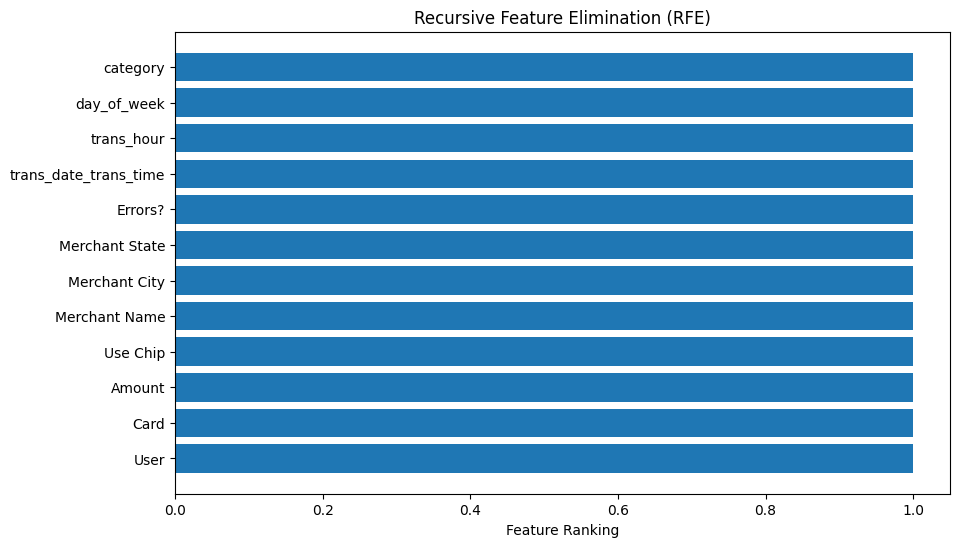

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=clf, n_features_to_select=12)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the ranking of features (1 indicates selected, 0 indicates not selected)
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Plot bar plot of feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(feature_ranking)), feature_ranking)
ax.set_yticks(range(len(feature_ranking)))
ax.set_yticklabels(selected_features)
ax.set_xlabel('Feature Ranking')
ax.set_title('Recursive Feature Elimination (RFE)')
plt.show()


### SHAP Explainer

In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(xgboost_model)

# Explain predictions for the test set
shap_values = explainer(X_test)

In [ ]:
shap_values.shape

(28098, 12)

In [ ]:
# # Option 1: Access core SHAP values (assuming they're the first dimension)
# core_shap_values = shap_values[:, :, 0]  # Select first dimension for each data point and feature

### Beeswarm plot

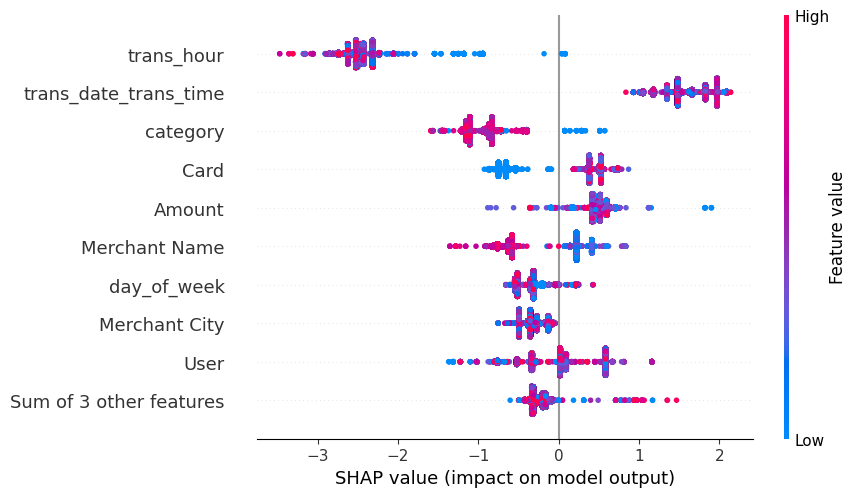

In [ ]:
shap.plots.beeswarm(shap_values)

### Waterfall plot

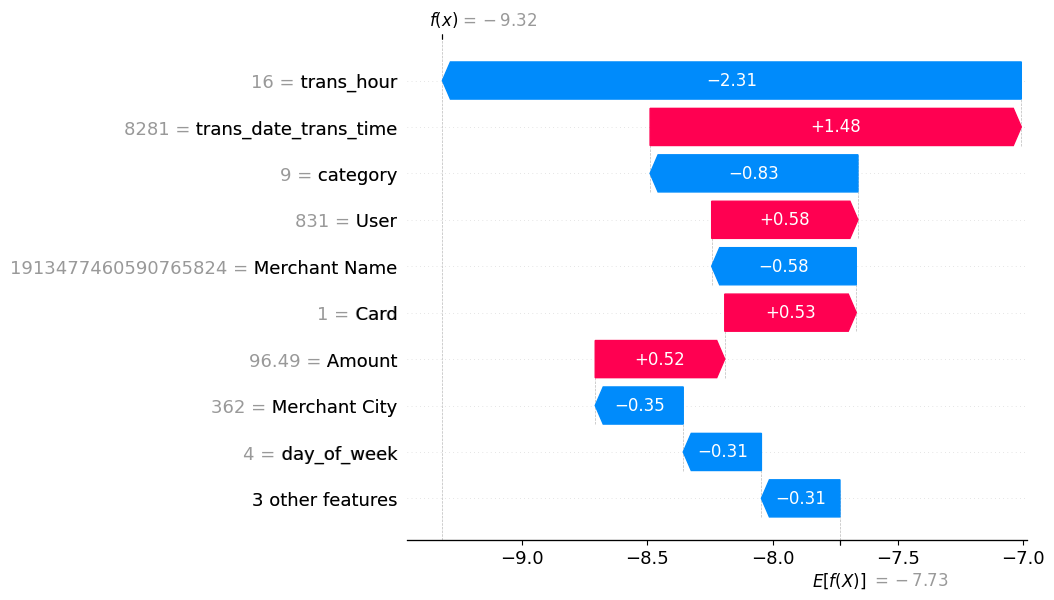

In [ ]:
#Waterfall plot for first observation
shap.plots.waterfall(shap_values[107])

### Mean Shap plot

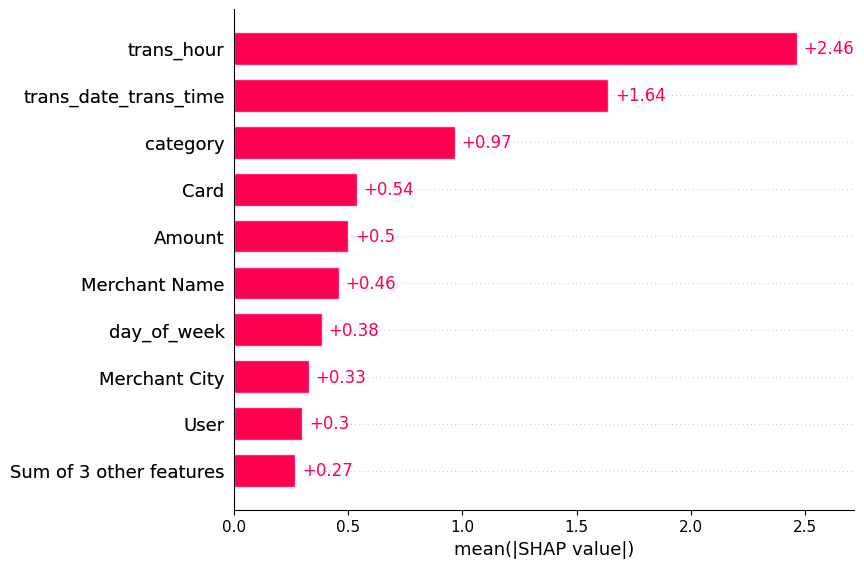

In [ ]:
shap.plots.bar(shap_values)

### Applying Permutation Feature

In [ ]:
X_test['Amount'] = X_test['Amount'].astype(float)

In [ ]:
X_test.dtypes

User                       int64
Card                       int64
Amount                   float64
Use Chip                   int64
Merchant Name              int64
Merchant City              int64
Merchant State             int64
Errors?                    int64
trans_date_trans_time      int64
trans_hour                 int64
day_of_week                int64
category                   int64
dtype: object

In [ ]:
# Function to calculate permutation feature importance
def permutation_importance(model, X, y, metric, num_iterations=100):
    baseline_score = metric(y, model.predict(X))
    importances = {}
    for col in X.columns:
        importance_scores = []
        for _ in range(num_iterations):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col])
            permuted_score = metric(y, model.predict(X_permuted))
            #importance_scores.append(permuted_score - baseline_score)
            importance_scores.append(baseline_score - permuted_score)
        importances[col] = np.mean(importance_scores)
    return importances



Permutation Feature Importances:
User: 0.0000
Card: 0.0000
Merchant State: 0.0000
Errors?: 0.0000
trans_date_trans_time: 0.0000
day_of_week: 0.0000
trans_hour: 0.0000
Merchant Name: 0.0000
Amount: 0.0000
Merchant City: 0.0000
Use Chip: 0.0001
category: 0.0002


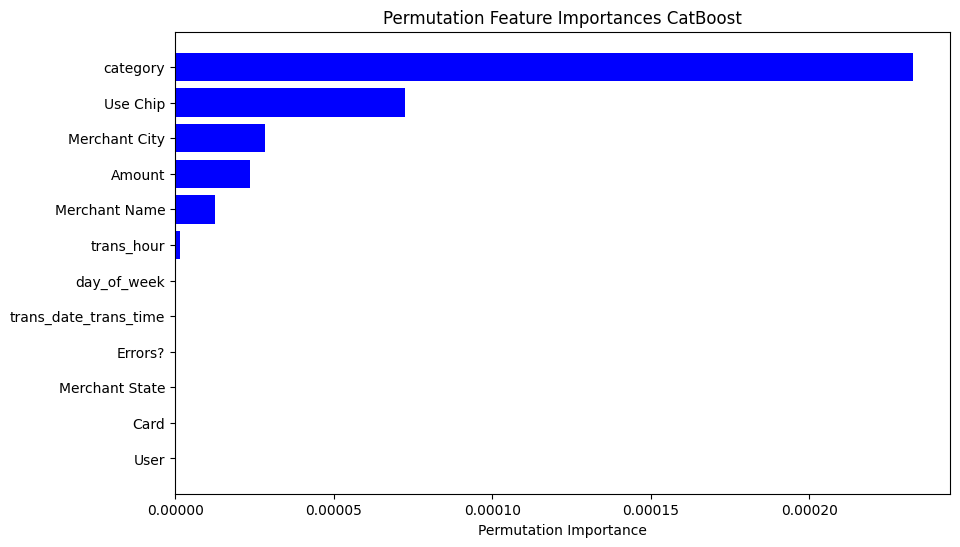

In [ ]:

# Calculate permutation feature importance
importances = permutation_importance(xgboost_model, X_test, y_test, accuracy_score)

# Sort feature importances
sorted_importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=False)}

# Print feature importances
print("\nPermutation Feature Importances:")
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))

# Assigning colors based on values
colors = ['blue' if v >= 0 else 'red' for v in sorted_importances.values()]

plt.barh(range(len(sorted_importances)), list(sorted_importances.values()), color=colors, align='center')
plt.yticks(range(len(sorted_importances)), list(sorted_importances.keys()))
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importances CatBoost')
plt.show()

## Training Models from the best features

In [ ]:
X_train.columns

Index(['User', 'Card', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City',
       'Merchant State', 'Errors?', 'trans_date_trans_time', 'trans_hour',
       'day_of_week', 'category'],
      dtype='object')

## Important features from SHAP

In [ ]:
# Selected Features from SHAP
selected_feat1 = ['trans_hour', 'Merchant City', 'Use Chip', 'day_of_week', 'trans_date_trans_time', 'Card','category', 'Amount', 'Merchant State' ,'Is Fraud?']  # Specify the column names you want to keep
df_imp_feat_SHAP = df_cred[selected_feat1]  # Subset the DataFrame with selected columns


In [ ]:
# Separate features and target
X = df_imp_feat_SHAP.drop('Is Fraud?', axis=1)
y = df_imp_feat_SHAP['Is Fraud?']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 484, number of negative: 145850
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 146334, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003308 -> initscore=-5.708249
[LightGBM] [Info] Start training from score -5.708249


In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 99.65%
SVM: Validation Accuracy = 99.65%
Random Forest: Validation Accuracy = 99.72%
XGBoost: Validation Accuracy = 99.72%
LightGBM: Validation Accuracy = 99.59%


In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


Random Forest : Test Accuracy: 99.73%
XGBoost : Test Accuracy: 99.73%


### Important Features from PFI

In [ ]:
# Selected Features form PFI

selected_feat2 = ['category', 'Use Chip', 'Merchant City', 'Amount', 'Merchant Name', 'trans_hour', 'Is Fraud?']


df_imp_feat_PFI = df_cred[selected_feat2]  # Subset the DataFrame with selected columns


In [ ]:
# Separate features and target
X = df_imp_feat_PFI.drop('Is Fraud?', axis=1)
y = df_imp_feat_PFI['Is Fraud?']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier()
lightgbm_model = lgb.LGBMClassifier()

# Assign models to a dictionary
models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model,
    'LightGBM': lightgbm_model
}

# Compare models using validation set
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    results[model_name] = val_accuracy

[LightGBM] [Info] Number of positive: 484, number of negative: 145850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 146334, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003308 -> initscore=-5.708249
[LightGBM] [Info] Start training from score -5.708249


In [ ]:
# Print validation set results
for model_name, accuracy in results.items():
    print(f"{model_name}: Validation Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Validation Accuracy = 99.65%
SVM: Validation Accuracy = 99.65%
Random Forest: Validation Accuracy = 99.81%
XGBoost: Validation Accuracy = 99.82%
LightGBM: Validation Accuracy = 99.73%


In [ ]:
# Sort the models based on validation accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extract the names of the top two models
best_model_names = [model_name for model_name, _ in sorted_models[:2]]

# Extract the top two models
best_models = {model_name: models[model_name] for model_name in best_model_names}

# Train and evaluate the top two models on the test set
for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"{model_name} : Test Accuracy: {test_accuracy*100:.2f}%")


XGBoost : Test Accuracy: 99.83%
Random Forest : Test Accuracy: 99.80%
